In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Test_set.csv')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
df.shape

(2671, 10)

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [7]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2666,False,False,False,False,False,False,False,False,False,False
2667,False,False,False,False,False,False,False,False,False,False
2668,False,False,False,False,False,False,False,False,False,False
2669,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No  Null values.

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

we need to change string variable into numerical value.

In [10]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Date_of_Journey']=le.fit_transform(df['Date_of_Journey'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Route']=le.fit_transform(df['Route'])
df['Dep_Time']=le.fit_transform(df['Dep_Time'])

df['Arrival_Time']=le.fit_transform(df['Arrival_Time'])
df['Duration']=le.fit_transform(df['Duration'])

df['Total_Stops']=le.fit_transform(df['Total_Stops'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])




In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5


In [12]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,23.662673,1.961438,1.432797,54.356421,96.249719,435.586672,169.453014,1.422688,4.634594
std,2.295657,12.536017,1.184328,1.467971,27.128993,54.620936,193.250349,93.907162,1.795728,0.760781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,14.000000,2.000000,0.000000,33.000000,48.000000,276.000000,91.000000,0.000000,5.000000
50%,4.000000,24.000000,2.000000,1.000000,51.000000,88.000000,481.000000,209.000000,0.000000,5.000000
75%,6.000000,35.000000,3.000000,2.000000,76.000000,146.000000,600.000000,241.000000,4.000000,5.000000
max,10.000000,43.000000,4.000000,5.000000,99.000000,198.000000,703.000000,319.000000,4.000000,5.000000


skewness present in Destination,Route,Dep_Time and Total_Stops.
outliers present in Route,Dep_Time.

In [13]:
df_cor=df.corr()
df_cor

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
Airline,1.000000,0.018772,-0.031107,0.033630,0.023995,-0.000056,-0.019198,0.027559,0.039236,-0.084423
Date_of_Journey,0.018772,1.000000,0.146850,-0.260489,0.247562,-0.023362,-0.009460,-0.013174,-0.042129,0.034785
Source,-0.031107,0.146850,1.000000,-0.578296,0.339434,0.048534,-0.002197,-0.169256,-0.212995,-0.025205
Destination,0.033630,-0.260489,-0.578296,1.000000,-0.444760,-0.035993,-0.004226,-0.007661,0.331240,0.026295
Route,0.023995,0.247562,0.339434,-0.444760,1.000000,-0.146110,-0.004257,-0.053478,-0.441772,0.059682
Dep_Time,-0.000056,-0.023362,0.048534,-0.035993,-0.146110,1.000000,-0.007133,0.073045,0.080940,-0.070610
Arrival_Time,-0.019198,-0.009460,-0.002197,-0.004226,-0.004257,-0.007133,1.000000,0.048875,-0.094387,0.016033
Duration,0.027559,-0.013174,-0.169256,-0.007661,-0.053478,0.073045,0.048875,1.000000,0.197855,0.051093
Total_Stops,0.039236,-0.042129,-0.212995,0.331240,-0.441772,0.080940,-0.094387,0.197855,1.000000,0.136402
Additional_Info,-0.084423,0.034785,-0.025205,0.026295,0.059682,-0.070610,0.016033,0.051093,0.136402,1.000000


<AxesSubplot:>

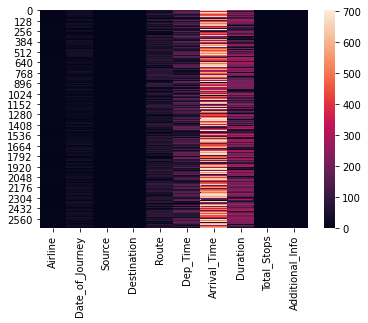

In [14]:
sns.heatmap(df)

No null values present.

<AxesSubplot:>

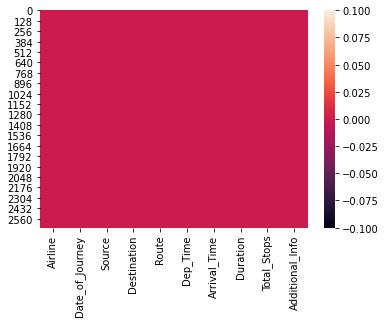

In [15]:
sns.heatmap(df.isnull())

No Null values present.

<AxesSubplot:>

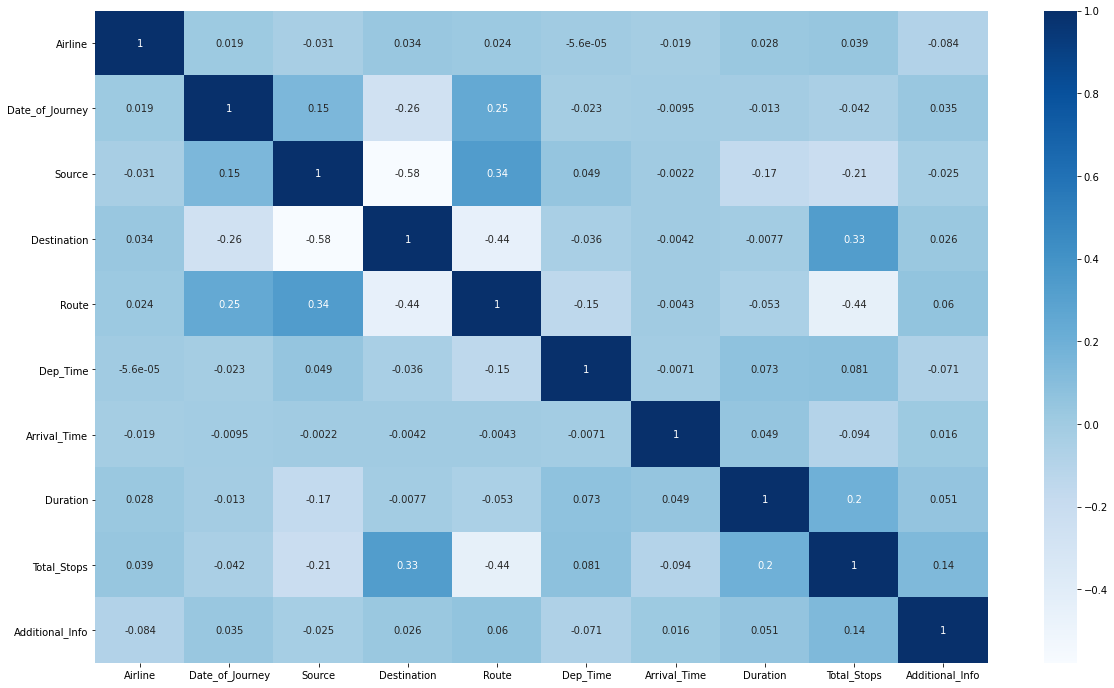

In [16]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Airline  is highly correlate with Total_Stops.
Airline is least correlate with Arrival_Time.

<AxesSubplot:>

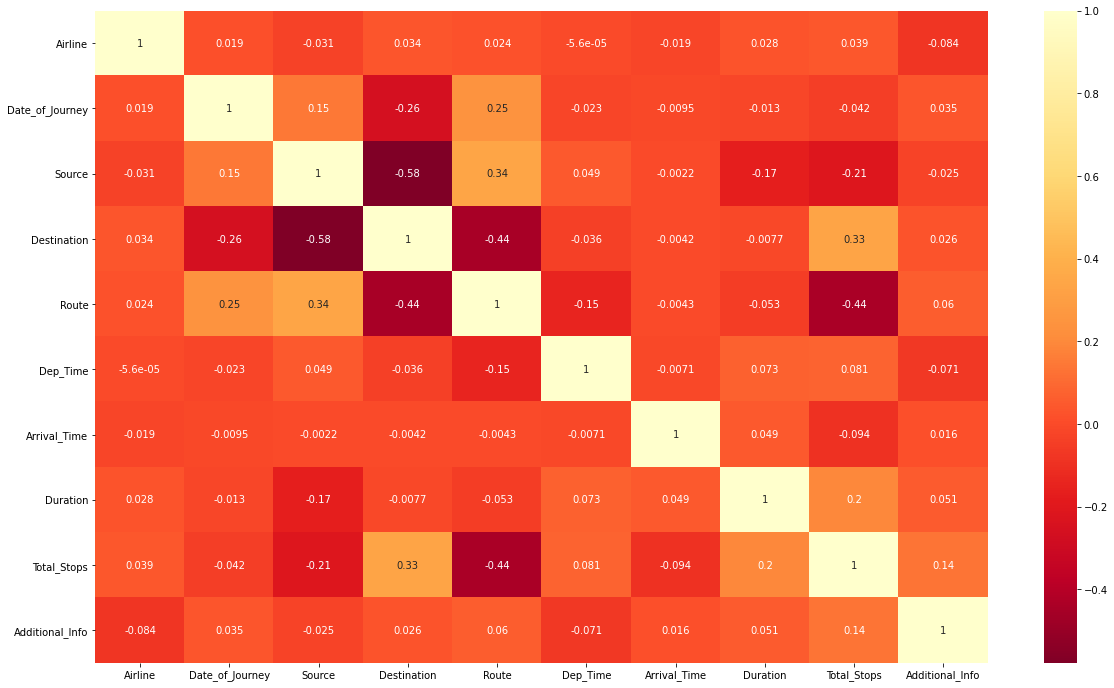

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

Airline  is highly correlate with Total_Stops.
Airline is least correlate with Arrival_Time.

In [18]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [19]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
df.drop('Source',axis=1,inplace=True)

In [21]:
df.drop('Destination',axis=1,inplace=True)

In [22]:
df.drop('Dep_Time',axis=1,inplace=True)

In [23]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [24]:
df.head()

,Airline,Route,Duration,Total_Stops,Additional_Info
0,4,76,10,0,5
1,3,65,248,0,5
2,4,76,148,0,3
3,6,76,36,0,5
4,0,16,216,4,5


<AxesSubplot:xlabel='Airline', ylabel='Density'>

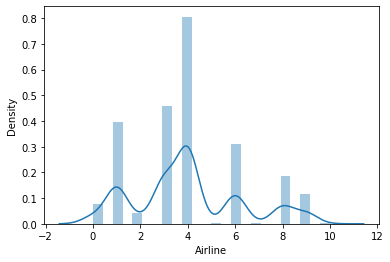

In [25]:
sns.distplot(df['Airline'])

skewness present.

<AxesSubplot:xlabel='Route', ylabel='Density'>

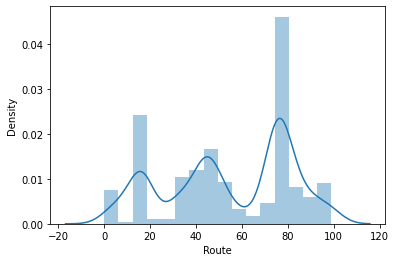

In [26]:
sns.distplot(df['Route'])

 skewness present.

<AxesSubplot:xlabel='Duration', ylabel='Density'>

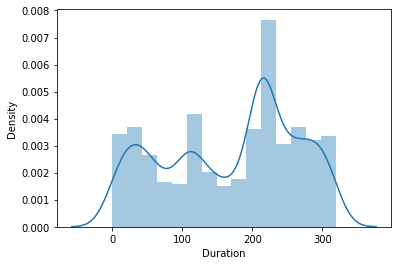

In [27]:
sns.distplot(df['Duration'])

skewness present.

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

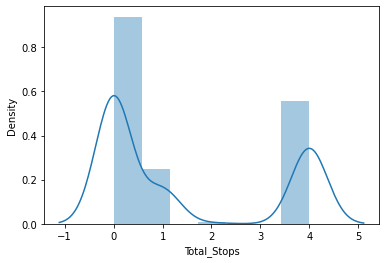

In [28]:
sns.distplot(df['Total_Stops'])

 skewness present.

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

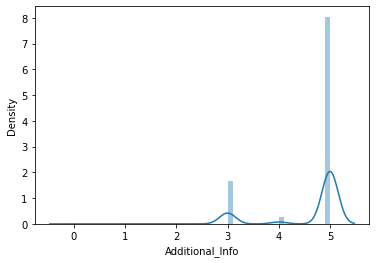

In [29]:
sns.distplot(df['Additional_Info'])

skewness present.

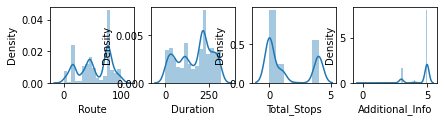

In [30]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [31]:
df.columns

Index(['Airline', 'Route', 'Duration', 'Total_Stops', 'Additional_Info'], dtype='object')

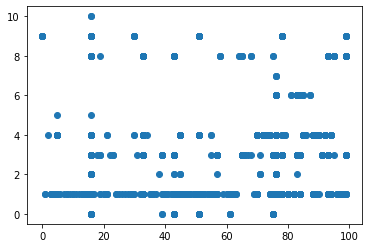

In [32]:
plt.scatter(df['Route'],df['Airline'])

Route  is defined from 0 to 10.

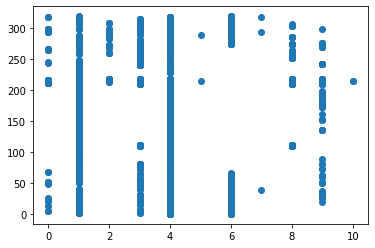

In [33]:
plt.scatter(df['Airline'],df['Duration'])

Duration has a range from 0 to 300.

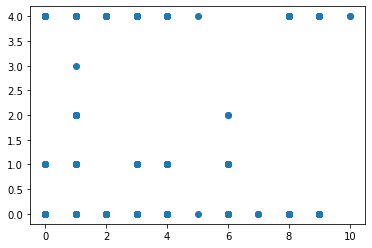

In [34]:
plt.scatter(df['Airline'],df['Total_Stops'])

Total_Stops has a range from 0.0 to 4.0.

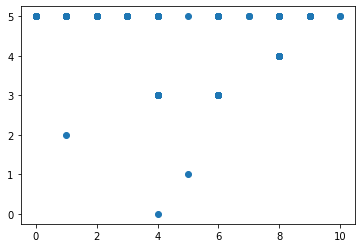

In [35]:
plt.scatter(df['Airline'],df['Additional_Info'])

Additional_Info range from 0 to 5.

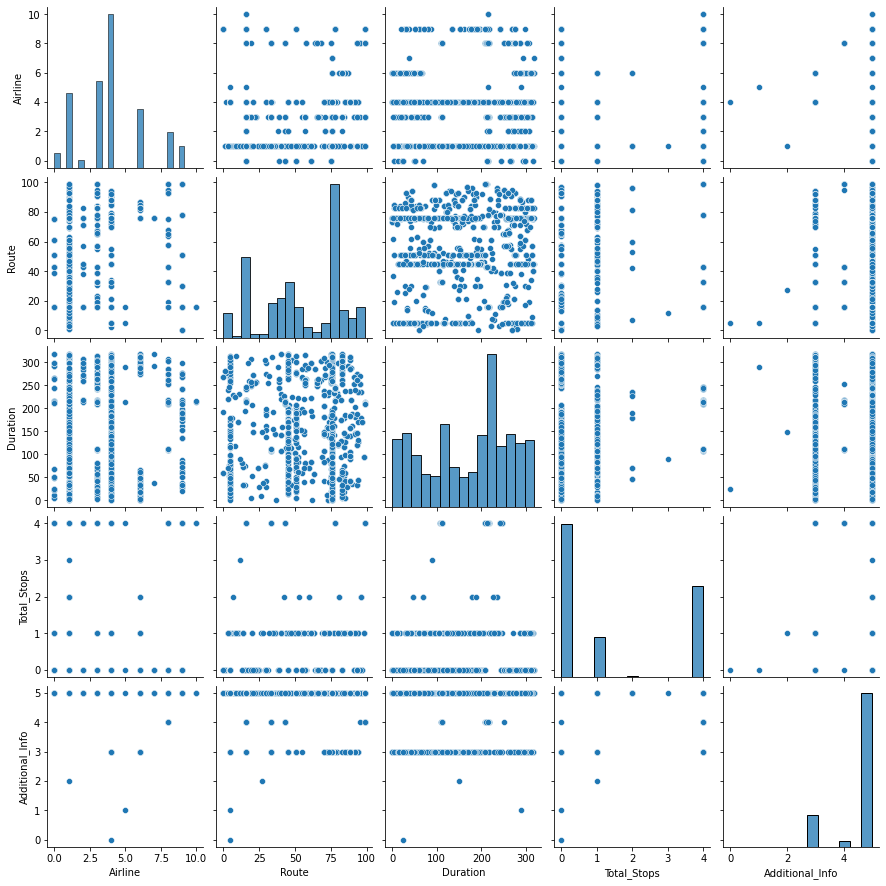

In [36]:
sns.pairplot(df)

In [37]:
df.skew()

Airline            0.483882
Route             -0.281807
Duration          -0.275404
Total_Stops        0.672623
Additional_Info   -1.719119
dtype: float64

all columns are object type so that  we will not remove skewness .

In [38]:
df.columns

Index(['Airline', 'Route', 'Duration', 'Total_Stops', 'Additional_Info'], dtype='object')

<AxesSubplot:>

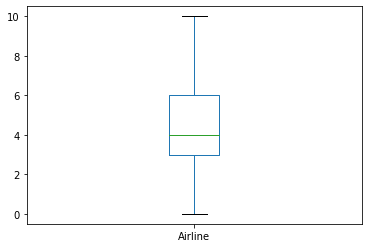

In [39]:
df['Airline'].plot.box()

 No outliers present.

<AxesSubplot:>

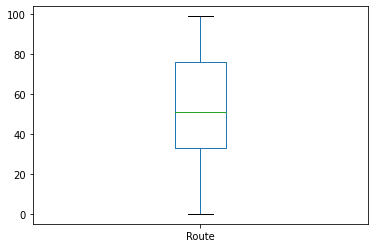

In [40]:
df['Route'].plot.box()

No outliers present.

<AxesSubplot:>

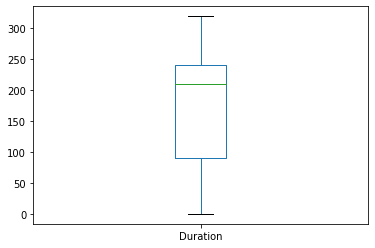

In [41]:
df['Duration'].plot.box()

No outliers present.

<AxesSubplot:>

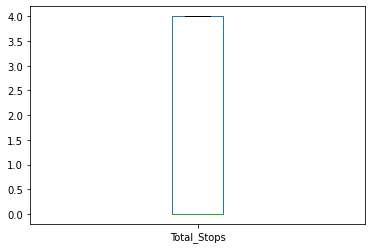

In [42]:
df['Total_Stops'].plot.box()

No outliers present.

<AxesSubplot:>

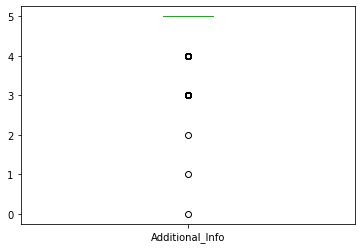

In [43]:
df['Additional_Info'].plot.box()

 outliers present.

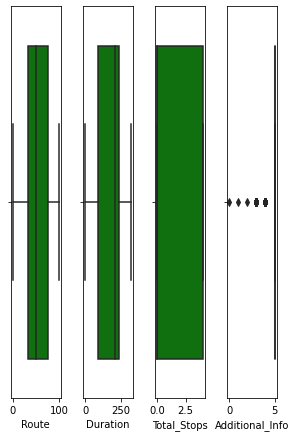

In [44]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers present in Additional_Info.

In [45]:
df.columns

Index(['Airline', 'Route', 'Duration', 'Total_Stops', 'Additional_Info'], dtype='object')

In [46]:
df.dtypes

Airline            int32
Route              int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
dtype: object

# Removing Outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 954, 1802, 1861], dtype=int64), array([4, 4, 4], dtype=int64))


In [48]:
z[954][4]

6.093029613616474

In [49]:
z[1861][4]

3.4636601818417585

In [50]:
df1=df[(z<3).all(axis=1)]

In [51]:
df1.shape

(2668, 5)

In [52]:
df.shape

(2671, 5)

2671-2668=3 outliers are removed from Dataframe.

# Testing The Model

In [469]:
import joblib
file=joblib.load('flight.obj')
predicted=file.predict(df)
predicted

array([11393.60100202, 11038.46597163, 10850.9490685 , ...,
       10827.88179046, 11301.64831815, 11302.21489461])

In [470]:
np.savetxt('flighttest.csv',predicted ,delimiter=',')